In [32]:
# Problem 1
import numpy as np
from scipy import linalg as la

def truncated_svd(A, k = None):
    w, v = la.eigh(np.dot(np.conjugate(A.T),A))
    n = len(w[w > 0])
    if k is None or k>n:
        k = n
    indices = np.argsort(w)[::-1][:k]
    eigs_sq = w[indices]
    eigs = np.sqrt(eigs_sq)
    vecs = v[:, indices]
    u=np.zeros((A.shape[0],k))
    for i in range(k):
        u[:,i]=1./eigs[i] * np.dot(A, vecs[:,i])
    return u, eigs, vecs

A = np.array([[2, 3, 5], [2, 5, 4]])
u, sigma, v = truncated_svd(A)
np.allclose(np.dot(np.dot(u, np.diag(sigma)), v.T), A)

True

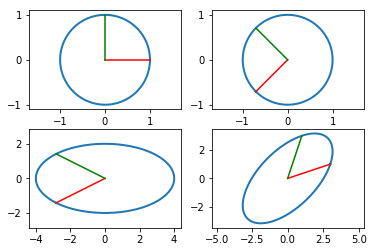

In [59]:
# Problem 2
from matplotlib import pyplot as plt
A = np.array([[3, 1], [1, 3]])
theta = np.linspace(0, 2*np.pi, 200)
r = np.linspace(0, 1, 200)
r1 = np.zeros(200)
e1 = np.stack((r, r1))
e2 = np.stack((r1, r))
x = np.cos(theta)
y = np.sin(theta)
s = np.stack((x, y))
    
u, sigma, v = la.svd(A)
    
# S
plt.subplot(221)
plt.plot(s[0,:], s[1,:], '-', lw=2)
plt.plot(e1[0, :],e1[1,:], c = 'r')
plt.plot(e2[0, :],e2[1,:], c='g')
plt.axis("equal")    

# V^H S
plt.subplot(222)
vhs = np.dot(v.T, s)
e11 = np.dot(v.T, e1)
e21 = np.dot(v.T, e2)
plt.plot(vhs[0, :], vhs[1, :], '-', lw=2)
plt.plot(e11[0, :],e11[1,:], c = 'r')
plt.plot(e21[0, :],e21[1,:], c='g')
plt.axis("equal")

# sigma V^H S
plt.subplot(223)
svhs = np.dot(np.dot(np.diag(sigma), v.T), s)
plt.plot(svhs[0, :], svhs[1, :], '-', lw=2)
e12 = np.dot(np.dot(np.diag(sigma), v.T), e1)
e22 = np.dot(np.dot(np.diag(sigma), v.T), e2)
plt.plot(e12[0, :],e12[1,:], c = 'r')
plt.plot(e22[0, :],e22[1,:], c='g')
plt.axis("equal")    

# U sigma V^H S
plt.subplot(224)
Usvhs = np.dot(np.dot(np.dot(u, np.diag(sigma)), v.T), s)
plt.plot(Usvhs[0, :], Usvhs[1, :], '-', lw=2)
e13 = np.dot(np.dot(np.dot(u, np.diag(sigma)), v.T), e1)
e23 = np.dot(np.dot(np.dot(u, np.diag(sigma)), v.T), e2)
plt.plot(e13[0, :],e13[1,:], c = 'r')
plt.plot(e23[0, :],e23[1,:], c='g')
plt.axis("equal") 
plt.show()
    


In [80]:
# Problem 3
def svd_approx(A, k):
    U,s,Vh = la.svd(A, full_matrices=False)
    S = np.diag(s[:k])
    Ahat = U[:,:k].dot(S).dot(Vh[:k,:])
    return Ahat

# Test
A = np.array([[2, 5, 4],[3, 1, 2], [2, 4, 5]])
svd_approx(A, 2)

array([[ 1.7816323 ,  4.6397604 ,  4.46180348],
       [ 2.94873016,  0.91542052,  2.10842533],
       [ 2.24106079,  4.39767621,  4.49020524]])

In [82]:
# Problem 4
def lowest_rank_approx(A, e):
    U,s,Vh = la.svd(A, full_matrices=False)
    k = np.min(np.where(s < e))
    return svd_approx(A, k)

# Test
A = np.array([[2, 5, 4],[3, 1, 2], [2, 4, 5]])
lowest_rank_approx(A, 1)

array([[ 1.7816323 ,  4.6397604 ,  4.46180348],
       [ 2.94873016,  0.91542052,  2.10842533],
       [ 2.24106079,  4.39767621,  4.49020524]])

In [113]:
# Problem 5
%matplotlib inline
import os
import matplotlib.image as mpimg
def compress_img(k, filename = 'hubble.jpg'):
    path = '/Users/Sophia/Desktop/BootCamp2017/Computation/Wk3_Decomp'
    image = plt.imread(os.path.join(path, filename)).astype('float')
    R = image[:, :, 0]
    R /= np.amax(R)
    G = image[:, :, 1]
    G /= np.amax(G)
    B = image[:, :, 2]
    B /= np.amax(B)
    
    R_hat = svd_approx(R, k)
    G_hat = svd_approx(G, k)
    B_hat = svd_approx(B, k)

    R_hat /= np.amax(R_hat)
    G_hat /= np.amax(G_hat)
    B_hat /= np.amax(B_hat)
    
    R_hat[R_hat > 1] = 1
    R_hat[R_hat < 0] = 0
    G_hat[G_hat > 1] = 1
    G_hat[G_hat < 0] = 0
    B_hat[B_hat > 1] = 1
    B_hat[B_hat < 0] = 0
    
    image[:,:,0] = R
    image[:,:,1] = G
    image[:,:,2] = B
    image_1 = np.zeros_like(image)
    image_1[:,:,0] = R_hat
    image_1[:,:,1] = G_hat
    image_1[:,:,2] = B_hat
    
    plt.subplot(121)
    plt.imshow(image)
    plt.subplot(122)
    plt.imshow(image_1)
    plt.show()

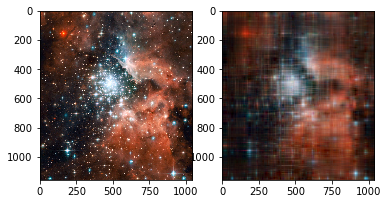

In [114]:
compress_img(10)

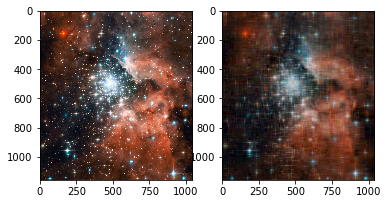

In [115]:
compress_img(20)

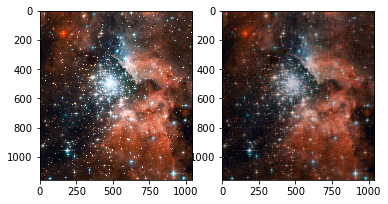

In [116]:
compress_img(50)